In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "../../../data/"
file_name = path + "pctdata.csv"
df = pd.read_csv(file_name)

## research the data

In [3]:
df

,id_plane,id_x,id_y,i_event,i_time_stamp
0,1,492.0,310.0,32,21600
1,1,493.0,310.0,32,21600
2,1,493.0,311.0,32,21600
3,1,492.0,311.0,32,21600
4,1,493.0,312.0,32,21600
...,...,...,...,...,...
220133,0,472.0,271.0,240306,19215829070
220134,0,472.0,272.0,240306,19215829070
220135,0,473.0,272.0,240306,19215829070
220136,0,472.0,273.0,240306,19215829070


#### To understand these data easily, <br/> we have to see 'describe()' and 'unique()' function in this dataframe.

In [4]:
df.describe()

,id_plane,id_x,id_y,i_event,i_time_stamp
count,220138.000000,220138.000000,220138.000000,220138.000000,2.201380e+05
mean,0.977087,542.052535,293.056724,121902.603517,9.747214e+09
std,0.808873,164.238880,95.414469,68927.426627,5.513849e+09
min,0.000000,0.000000,0.000000,32.000000,2.160000e+04
25%,0.000000,498.000000,253.000000,62468.000000,4.991985e+09
50%,1.000000,540.000000,293.000000,125313.000000,1.002388e+10
75%,2.000000,587.000000,340.000000,179091.000000,1.431988e+10
max,2.000000,1023.000000,511.000000,240306.000000,1.921583e+10


In [5]:
df['id_plane'].unique()

array([1, 2, 0], dtype=int64)

* There are only three values - ``0``, ``1``, ``2``.
* I can assume that they are indicated some type.

In [6]:
print(df['id_x'].count())
print(df['id_y'].count())
print(df['id_x'].nunique())
print(df['id_y'].nunique())

220138
220138
1024
512


* Alpide chip proton image size is 1024*512.
* ``id_x`` and ``id_y`` has same number of data.
* ``id_x`` has 1024 kinds of number, it may contains x coordinate in the image.
* ``id_y`` has 512 kinds of number, it may contains y coordinate in the image.

In [7]:
print(df['i_event'].unique())
print(df['i_event'].nunique())
print(df['i_event'].shape)

[    32     33     47 ... 240276 240277 240306]
22789
(220138,)


* In the dataframe table upside, same ``i_event`` has same ``i_time_stamp``.
* I can't say 'this is sure' now, but I will investigate it later.

In [8]:
print(df['i_time_stamp'].unique())
print(df['i_time_stamp'].nunique())
print(df['i_time_stamp'].shape)

[      21600       22400       33598 ... 19215805070 19215805870
 19215829070]
22789
(220138,)


* Through the name, I can assume that it will be related with time.
* This feature has same number of data with i_event.

### Find the relevence of ``i_time_stamp`` and ``i_event``

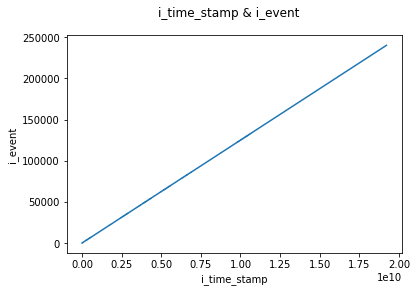

In [9]:
plt.plot(df['i_time_stamp'],df['i_event'])
plt.suptitle('i_time_stamp & i_event')
plt.xlabel('i_time_stamp')
plt.ylabel('i_event')
plt.show()

In [10]:
df.corr()

,id_plane,id_x,id_y,i_event,i_time_stamp
id_plane,1.000000,0.007633,-0.009102,-0.001380,-0.001379
id_x,0.007633,1.000000,0.000413,0.032230,0.032230
id_y,-0.009102,0.000413,1.000000,0.018255,0.018253
i_event,-0.001380,0.032230,0.018255,1.000000,1.000000
i_time_stamp,-0.001379,0.032230,0.018253,1.000000,1.000000


* It has a linear proportion.
* As the ``i_time_stamp`` goes up, ``i_event`` goes up too.
* To see the correlation, ``i_event`` has 1 corr value with ``i_time_stamp``, which means complete correlation.
* i_time_stamp may mean the relative time, and i_event may mean the groups that examination occured in the same time.